###### IMPORT ALL LIBRARIRES ################

In [2]:
import math
import csv
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt
import string

#### Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places ####

In [3]:
file = open('EuCitiesTemperatures.csv')
eu_cities = pd.read_csv(file)
dfcountrylats = eu_cities[['country', 'latitude','longitude']]
newdf = dfcountrylats.groupby('country',dropna = True).mean() #new DF which groups means by country
diclat= dict(newdf.latitude) #dictionary for latitude menas and country
diclong=dict(newdf.longitude) #dictionary for longitude menas and country

#function to get new latitude if latitude value == nan
changelat = lambda row: diclat.get(row['country']) if str(row['latitude']) == 'nan' else row['latitude'] 
eu_cities['latitude']= eu_cities.apply(changelat,axis=1) #APPLY LAMBDA FUNCTION TO EVERY ROW IN ORIGNAL DF
eu_cities['latitude']= round(eu_cities.latitude,2) #ROUND TO 2 DEC PLACES

#function to get new latitude if LONGITUDE value == nan
changelong = lambda row: diclong.get(row['country']) if str(row['longitude'])== 'nan' else row['longitude']
eu_cities['longitude']= eu_cities.apply(changelong,axis=1) #APPLY FUNCTION TO EVERY ROW
eu_cities['longitude']= round(eu_cities.longitude,2) #ROUND TO 2 DEC PLACES
print(eu_cities)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3        14.02         6.91

#### Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive) ####

In [4]:
#function to get city of entry that has lat and long in specified range
latinrangecheck = lambda row: row if (row['latitude'] >= 40 and row['latitude'] <= 60) and ((row['longitude']>= 15) and (row['longitude']<= 30)) else np.nan
#eu_cities['City in Range?'] = eu_cities.apply(latinrangecheck,axis=1) #put the city in given range into new column
euupdated = pd.DataFrame(data = eu_cities.apply(latinrangecheck,axis=1))
euupdated.dropna(axis=0,inplace = True,subset= 'city')
# subframe = pd.DataFrame(data=eu_cities,columns =['country','City in Range?']) #make new df that has country and which city were in range, will have nan
# new = subframe.dropna(how = 'any') #new df without the nan values of city() menaing those were not in given range
print('cities that lie between the given lat and long range are: \n')
# print(new['City in Range?'].reset_index(drop = True))  
euupdated.reset_index(drop=True,inplace=True)
euupdated

cities that lie between the given lat and long range are: 



,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
2,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
3,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
4,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42
...,...,...,...,...,...,...,...,...
58,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
59,Edirne,Turkey,79.62,no,yes,41.67,26.57,NaN
60,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
61,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


 #### Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.) ####

In [5]:

#print(new)
print('countrie(s) with most cities in the range of lat and long are/is:')
MostOccurCountryByCity= pd.DataFrame(euupdated['country'].mode())
print(MostOccurCountryByCity.country)

#eu_cities.drop(columns='City in Range?',inplace = True)  


countrie(s) with most cities in the range of lat and long are/is:
0     Poland
1    Romania
Name: country, dtype: object


#### Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no) ###

In [6]:
dfregiontemp = pd.DataFrame(data = euupdated, columns = ['EU','coastline','temperature'])
dfregiontemp=dfregiontemp.dropna()

dicofcombos={'noyes': [],'yesno':[], 'yesyes':[],'nono':[]}

def tempdicpercombo(row):
    row['join'] = row['EU']+row['coastline']
    dicofcombos[row['join']].append(row['temperature'])
    return row

dfregiontemp.apply(tempdicpercombo,axis=1)
combosforlater = dicofcombos.copy()
for key,listofvlas in dicofcombos.items():
    dicofcombos[key] = int(sum(dicofcombos.get(key))/len((dicofcombos.get(key))))

def filltempnan(row):
    EU = row['EU']  
    cl =row['coastline'] 
    tem = row['temperature'] 
    
    if str(tem)=='nan' :
        row['temperature'] = dicofcombos.get(str(EU+cl))
    return row
euupdated = euupdated.apply(filltempnan,axis=1)
euupdated

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
2,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
3,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
4,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42
...,...,...,...,...,...,...,...,...
58,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
59,Edirne,Turkey,79.62,no,yes,41.67,26.57,10.00
60,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
61,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


#### Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above ####


<class 'matplotlib.container.BarContainer'>


Text(0.5, 1.0, 'Cities in Each Region')

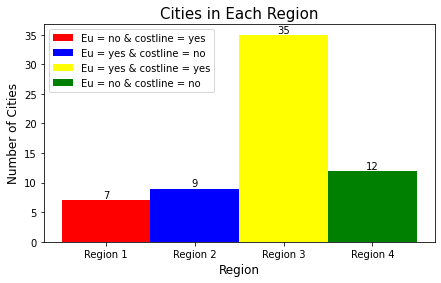

In [7]:
regiontotal = pd.DataFrame(data = euupdated, columns = ['city','EU','coastline'])
combotocity = {'noyes': 0,'yesno':0, 'yesyes':0,'nono':0}

def combocitycount(row):
    #combotocity[row['EU']+row['coastline']] = combotocity.get(row['EU']+row['coastline']) + 1
    combotocity[row[1]+row[2]] = combotocity.get((row[1]+row[2]))+1
    return row
regiontotal.apply(combocitycount,axis = 1)

regiontotal=pd.Series(data = combotocity)
propername = ['Eu = no & costline = yes','Eu = yes & costline = no','Eu = yes & costline = yes','Eu = no & costline = no' ]
# orignal = ['noyes','yesno','yesyes','nono']
regiontype = list(regiontotal.index)
numofcities = list(regiontotal.values)
c = ['red','blue','yellow','green']
regionnums = ['Region 1','Region 2','Region 3','Region 4']

plt.figure(figsize=(7, 4))
x = plt.bar(regionnums,numofcities,color=c,width = 1)
print(type(x))
plt.bar_label(x,labels = x.datavalues)
plt.legend(x,propername, loc = 'upper left')
plt.xlabel('Region',fontsize = 12)
plt.ylabel('Number of Cities',fontsize = 12)
plt.title('Cities in Each Region',fontsize = 15)

#### Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color ####

Text(0.5, 1.0, 'Longitude vs Latitude')

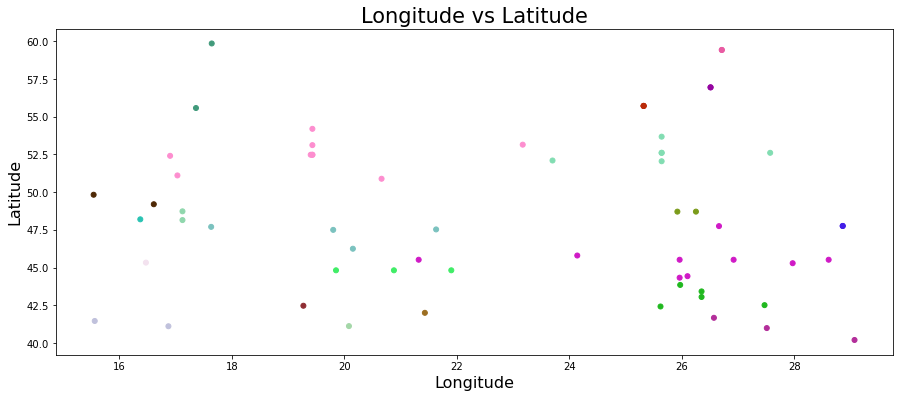

In [8]:
euupdated
import random
latitudes = list(euupdated.latitude)
longitudes = list(euupdated.longitude)
countries = list(set(euupdated.country))

#rand_colours = [random.choice(color) for i in range(len(latitudes))]
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
random_colors = get_colors(len(countries))
#function just to double check each color is different
def colornumcheck(random_colors):
    if len(set(random_colors)) != len(countries):
        for x in range(len(set(random_colors)),len(countries)):
            random_colors.append(get_colors(x))
    return random_colors     
colornumcheck(random_colors)
colorsdic = {countries[i]: random_colors[i] for i in range(0,len(countries))}
plt.figure(figsize = (15,6))
plt.scatter(x=euupdated.longitude,y=euupdated.latitude, s= 25, c= euupdated.country.map(colorsdic))
plt.xlabel('Longitude',fontsize = 16)
plt.ylabel('Latitude',fontsize = 16)
plt.title('Longitude vs Latitude',fontsize = 21)

#### The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups). ####

Text(0, 0.5, 'Number of Countries')

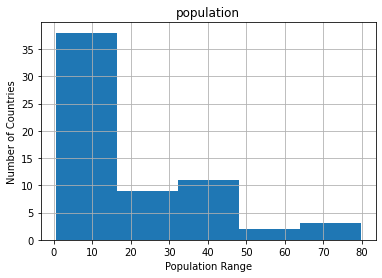

In [9]:
histogram_data = pd.DataFrame(data = euupdated,columns = euupdated.columns[:3])
histogram_data.hist(column=['population'],bins = 5)
plt.xlabel('Population Range',fontsize = 10)
plt.ylabel('Number of Countries')

#### Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above ####

Text(0.5, 1.0, 'non-EU Coastal')

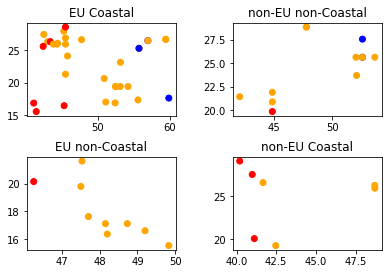

In [89]:
fig , axes = plt.subplots(2,2)
fig.tight_layout(pad = 2)
#adding color column to each row based on temp
euupdated.loc[euupdated['temperature']>10,'color'] = 'red'
euupdated.loc[euupdated['temperature']<6,'color'] = 'blue'
euupdated.loc[(euupdated['temperature']>=6) &(euupdated['temperature']<=10) ,'color'] = 'orange'

#region 1
region1 = pd.DataFrame(data = euupdated)
region1 = region1[(region1['EU']== 'yes')  & (region1['coastline']== 'yes')]
region1 = region1.get(['latitude','longitude','color'])
region1 = axes[0][0].scatter(x= region1.latitude,y =region1.longitude,c =region1.color )
axes[0][0].set_title('EU Coastal')

#region 2
region2 = pd.DataFrame(data = euupdated)
region2 = region2[(region2['EU']== 'no')  & (region2['coastline']== 'no')]
region2 = region2.get(['latitude','longitude','color'])
axes[0][1].scatter(x= region2.latitude,y =region2.longitude,c =region2.color )
axes[0][1].set_title('non-EU non-Coastal')

#region 3
region3 = pd.DataFrame(data = euupdated)
region3 = region3[(region3['EU']== 'yes')  & (region3['coastline']== 'no')]
region3 = region3.get(['latitude','longitude','color'])
axes[1][0].scatter(x= region3.latitude,y =region3.longitude,c =region3.color)
axes[1][0].set_title('EU non-Coastal')

#region 4
region4 = pd.DataFrame(data = euupdated)
region4 = region4[(region4['EU']== 'no')  & (region4['coastline']== 'yes')]
region4 = region4.get(['latitude','longitude','color'])
axes[1][1].scatter(x= region4.latitude,y =region4.longitude,c =region4.color )
axes[1][1].set_title('non-EU Coastal')

#all of these cities are in 
